In [13]:

import pandas as pd
import numpy as np
import math

### 데이터에서 원하는 데이터만 가져오기

In [14]:

def excel_to_pd(fileURL):
    excel = pd.read_excel(fileURL)
    print(excel.columns)
    print(excel.index)
    excel = excel[['기관명', '지역구분(구,동)' ,'주소', '홈페이지주소', '처치실수', '공항까지의거리', '한줄소개']]

    for colurm in excel:
        for i in excel.index:
            
            #print(f'excel[colurm][i]: {excel[colurm][i]} {type(excel[colurm][i])} ')
            try:
                if type(excel[colurm][i]) != 'str' and np.isnan(int(excel[colurm][i])):
                    excel[colurm][i] = '-'
            except:
                pass
    
    return excel


data = excel_to_pd('./ganam_medical_treval.xls')
data
# data.to_excel('./ganam_medical_treval_filtered.xls')


Index(['의료기관번호', '기관명', '기관분류', '기관장명', '코디네이터', '이메일', '지역구분(구,동)', '주소',
       '상세주소', '우편번호', '홈페이지주소', '병상수', '의료진', '면적', '기관소개', '지도좌표(X)',
       '지도좌표(Y)', '전문분야', '유치업등록번호', '보험정보', '공항까지의거리', '택시교통편', '기타교통편',
       '적용여부', '한줄소개', '보유장비', '부가정보', '등록일', '최종수정', '상담가능언어', '분류코드',
       '기관종업원수', '처치실수', '마취가능의사상주여부', '심장제세동기설치여부', '기관인증'],
      dtype='object')
RangeIndex(start=0, stop=252, step=1)


,기관명,"지역구분(구,동)",주소,홈페이지주소,처치실수,공항까지의거리,한줄소개
0,비오페이스의원,Sinsa,서울 강남구 강남대로152길 22,http://www.bioface.kr,6,NaN,NaN
1,에프아이성형외과,Sinsa,서울 강남구 논현로 873,http://fipsclinic.com/,3 / 2,NaN,NaN
2,힐링안과,Yeoksam,서울 강남구 강남대로 470,http://www.healingeye.co.kr/,8,NaN,NaN
3,클린피부과,Cheongdam,서울 강남구 압구정로 432,http://www.cleanskinclinic.co.kr/,NaN,NaN,NaN
4,에이탑 성형외과,Yeoksam,서울 강남구 강남대로 94길 10 K SQUARE 4층/5층,http://www.atopps.com/,8 / 4,NaN,NaN
...,...,...,...,...,...,...,...
247,정관복원술,-,-,NaN,NaN,NaN,NaN
248,추간판탈출증,-,-,NaN,NaN,NaN,NaN
249,척추고정술,-,-,NaN,NaN,NaN,NaN
250,무릎인공관절 전치술,-,-,NaN,NaN,NaN,NaN


### 데이터를 여러 파일로 분리하기

In [15]:
seoul_data = pd.read_csv('https://gist.githubusercontent.com/padawanR0k/ccc285fb7aaa94d814f5f859a8e9eac7/raw/fad36756bd0701452755a20af1050e780c5bc684/seoul_local_population_2.csv', index_col='자치구')

for gu in seoul_data.index:
    seoul_data.loc[gu].to_excel(f'./{gu}.xlsx') # 1~100세를 구별로 구분하여 엑셀로 저장


In [16]:
import glob

# 원하는 자치구 데이터만 merge하여 하나의 excel로 만들기
def merge_data(gu):

    files = glob.glob('*구.xlsx')

    emptyDf = pd.DataFrame()
    indexs = []
    for g  in list(filter(lambda x: f'{x}.xlsx' in files, gu)):
        data = pd.read_excel(f'./{g}.xlsx', index_col=0)
        indexs = list(data.index)
        emptyDf[g] = data[g]
    
    emptyDf.to_excel('./통합.xlsx', index_label=indexs, sheet_name='구별_통합.xlsx', engine='xlsxwriter')

merge_data(['도봉구', '강남구', '노원구', '중랑구'])

In [17]:



# 30만명넘는 자치구만 필터링하기
def get_big_city():
    return seoul_data[seoul_data['합계'] > 500000]
    
big_city = get_big_city()


# print(big_city)

# 내가 원하는 인덱스갖는 행과 열만 출력하기
# 시작행:종료행, 시작열, 정료열 
teenage_data = big_city.iloc[0:3, 2:13] # 자치구중 50만명이상 인구를 가진 자치구의 0~10세 인구
teenage_data

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세
자치구,,,,,,,,,,,
노원구,2347,2572,2846,3160,3570,3761,3707,4099,4192,4549,4290
강서구,3355,3528,3708,3919,4581,4482,4461,4623,4693,4548,4122
강남구,2320,2567,2844,3062,3605,3913,4306,4890,4925,5332,5122


In [18]:
# 자치구별 모든 행 총합
teenage_data.sum(axis = 1)

자치구
노원구    39093
강서구    46020
강남구    42886
dtype: int64

In [19]:
# 모든 열 총합
teenage_data.sum(axis = 0)

0세      8022
1세      8667
2세      9398
3세     10141
4세     11756
5세     12156
6세     12474
7세     13612
8세     13810
9세     14429
10세    13534
dtype: int64

In [20]:
# 자치구별 모든 행 총합을 더하고 기존 시트에 더하기
sum = pd.DataFrame(teenage_data.sum(axis = 1), columns = ['총합'])
sum

teenage_data = teenage_data.join(sum)

In [21]:
# 특정열을 기준으로 정렬
teenage_data.sort_values(by='총합', ascending=False)

,0세,1세,2세,3세,4세,5세,6세,7세,8세,9세,10세,총합
자치구,,,,,,,,,,,,
강서구,3355,3528,3708,3919,4581,4482,4461,4623,4693,4548,4122,46020
강남구,2320,2567,2844,3062,3605,3913,4306,4890,4925,5332,5122,42886
노원구,2347,2572,2846,3160,3570,3761,3707,4099,4192,4549,4290,39093


In [22]:
import matplotlib.pyplot as plt
# teenage_data.mean()
plt.rcParams["font.size"] = 12
plt.rcParams["font.family"] = 'malgun gothic'
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.

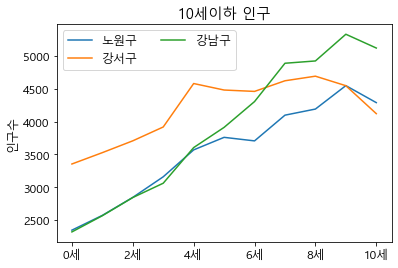

In [35]:
chart = teenage_data.T.loc[:'10세'].plot(title='10세이하 인구')
plt.legend(teenage_data.index, loc='left', markerfirst=True, title_fontsize=5, ncol=2)
chart.set_ylabel('인구수')

plt.savefig('./chart_img.png', dpi = 400)


## 엑셀 내부에 데이터와 시각화이미지를 넣기

In [40]:
# 엑셀에디터 객체 생성
excel_writer = pd.ExcelWriter('자치구0_10세_인구.xlsx', engine='xlsxwriter')

# 데이터를 엑셀 객체에 씀
teenage_data.to_excel(excel_writer, index=True, sheet_name='자치구0_10세_인구')

# worksheet 생성
worksheet = excel_writer.sheets['자치구0_10세_인구']

# 워크시트에 차트가 들어갈 위치를 지정해 이미지 넣기
imgUrl = './chart_img.png'
size= len(teenage_data.T.index)
worksheet.insert_image(1, size + 1, imgUrl, {'x_scale': 1, 'y_scale': 1})

# ExcelWriter 객체를 닫고 엑셀 저장
excel_writer.save()



## 엑셀 내부에 엑셀 차트 작성하기

In [45]:
# 엑셀에디터 객체 생성
excel_writer = pd.ExcelWriter('자치구0_10세_인구_with_chart.xlsx', engine='xlsxwriter')


sheet_name = '자치구0_10세_인구'
# 데이터를 엑셀 객체에 씀
teenage_data.to_excel(excel_writer, index=True, sheet_name=sheet_name)

# worksheet 생성
workbook = excel_writer.book
worksheet = excel_writer.sheets[sheet_name]

# 차트객체 생성
native_chart = workbook.add_chart({'type': 'line'})

# 생성된 차트객체에 대한 데이터값 범위지정
native_chart.add_series({'values': f'={sheet_name}!$B$2:$L$2', 'name': f'{sheet_name}!A$2', 'categories': f'{sheet_name}!$B$1:$L$1'})
native_chart.add_series({'values': f'={sheet_name}!$B$3:$L$3', 'name': f'{sheet_name}!A$3', 'categories': f'{sheet_name}!$B$1:$L$1'})
native_chart.add_series({'values': f'={sheet_name}!$B$4:$L$4', 'name': f'{sheet_name}!A$4', 'categories': f'{sheet_name}!$B$1:$L$1'})

native_chart.set_title({'name': '자치구별 0~10세 인구수'})
native_chart.set_x_axis({'name': '나이'})
native_chart.set_y_axis({'name': '인구 수'})

# 워크시트에 차트넣기
size= len(teenage_data.T.index)
worksheet.insert_chart(1, 1+size, native_chart)

excel_writer.save()

